In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Loading data

In [2]:
df = pd.read_csv("shot_logs.csv")

## First glance at the data

In [3]:
#number of rows and columns
df.shape

(128069, 21)

In [4]:
#get first 5 rows of dataframe
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [5]:
#column values
df.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

Features clarification:

 - GAME_ID - id of the game
 - MATCHUP - the game in which the shot was performed
 - LOCATION - whether it was home or away game (H/A)
 - W - whether it was won or lost game (W/L)
 - FINAL_MARGIN - final shot margin
 - SHOT_NUMBER - ordinal number of the shot in the game
 - PERIOD - ordinal number of the quarter in the game
 - GAME_CLOCK - current time of the game quarter
 - SHOT_CLOCK - time remaining for performing the shot
 - DRIBBLES - number of dribbles preceding the shot
 - TOUCH_TIME - how long was basketball in the shooters hands
 - SHOT_DIST - shot distance from the basket
 - PTS_TYPE - whether it was 2 point shot or 3 point shot
 - SHOT_RESULT - this feature is gonna be our target class (whether shot was made or missed)
 - CLOSEST_DEFENDER - name of the closest defender from the shooter
 - CLOSEST_DEFENDER_PLAYER_ID - player id from the closest defender from the shooter
 - CLOSE_DEF_DIST - closest defender distance from the shooter
 - FGM - field goals made from the shot
 - PTS - points made from the shot
 - player_name - player name
 - player_id - player id


In [6]:
#describe our dataframe
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


**Output of function `pandas.DataFrame.describe` represent values of descriptive statistics .**

1. *count* - represents the total number of values ​​in the columns.
2. *unique* - unique values counter. 
3. *top* - dominant value (mod) **D**.
4. *freq* - dominant value frequency.
5. *mean* - arithmetic mean **M**.
6. *std* - standard deviation.
7. *min* - minimum value.
8. *25%* - **Q<sub>1</sub>**
9. *50%* - **Q<sub>2</sub>** = Central value (the median) **C**
10. *75%* - **Q<sub>3</sub>**
11. *max* - **Q<sub>4</sub>**, upper bound.

### Monotonic attributes

In [7]:
df.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

We can see that player_name and player_id have the same meaning as well as CLOSEST_DEFENDER and CLOSEST_DEFENDER_PLAYER_ID.
So we can drop one of the columns for both cases. I decided to drop ID values and keep names of players.

In [8]:
df.drop(('CLOSEST_DEFENDER_PLAYER_ID'), axis=1, inplace=True)
df.drop(('player_id'), axis=1, inplace=True)

### Removing excess features

I noticed that the features "FGM" (field goals made) and "PTS" (points made) were perfect predictors of whether a shot attempt succeeded or not. Because if value of feature "FGM" was 1 we automatically know that shot succeeded as well as we know that shot succeeded if value of feature "PTS" was bigger than 0. Therefore I removed this features.

In [9]:
df.drop(('FGM'), axis=1, inplace=True)
df.drop(('PTS'), axis=1, inplace=True)

Also, if we are trying to use, for example classification, we won't be able to perform it because of having non-numeric features. When we look deeply in the data we can diagnose features that won't make any sense if we replace them with numeric values. "GAME ID", "MATCHUP", "CLOSEST DEFENDER" and "player name" are also excess features and would therefore confuse are future models so I decided to also remove them.

In [10]:
df.drop(('GAME_ID'), axis=1, inplace=True)
df.drop(('MATCHUP'), axis=1, inplace=True)
df.drop(('CLOSEST_DEFENDER'), axis=1, inplace=True)
df.drop(('player_name'), axis=1, inplace=True)

Now that we removed excess features we will once again take a look at our data and start visualizing it.

In [11]:
#first 5 rows of our dataframe
df.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,1.3
1,A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,6.1
2,A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,0.9
3,A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,3.4
4,A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,1.1


In [12]:
#describe our dataframe
df.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
count,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,4.123015
std,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,2.756446
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,5.300000
max,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000


### Missing data

We will take a look at our data and try to find missing (NA) values.

In [13]:
df.isna().sum()

LOCATION             0
W                    0
FINAL_MARGIN         0
SHOT_NUMBER          0
PERIOD               0
GAME_CLOCK           0
SHOT_CLOCK        5567
DRIBBLES             0
TOUCH_TIME           0
SHOT_DIST            0
PTS_TYPE             0
SHOT_RESULT          0
CLOSE_DEF_DIST       0
dtype: int64

As we can see in our dataset the only feature containing NA values is SHOT_CLOCK. SHOT_CLOCK feature has no value for 4.35% of total data for this feature.


In general, the options for dealing with missing values ​​are:
 - replace with the mean value
 - completely remove those records from the data set
 - completely remove those features from the dataset
 - interpolation
 - finding exact values ​​from other data sources
 - ...

The best option would probably be finding exact values ​​from other data sources but in this case that is not the option. It doesn't make any sense to just replace missing values with 0 or completely remove feature from the dataset because SHOT_CLOCK by intuition could be a good predictor. We can either remove records containing no value for this column or we can replace those missing values with mean value of all the SHOT_CLOCKs. I decided to remove records containing no value because my intuition tells me that SHOT_CLOCK could be good predictor for predicting shot success so I dont want to "ruin" that feature values with mean value or some other similar measure. Also, 4.35% less data shouldn't make a too big of a difference.

In [14]:
#remove records with missing data for SHOT_CLOCK column
df_tmp = df.copy()

# replace with mean value
#df_tmp.loc[df_tmp.SHOT_CLOCK.isna(),'SHOT_CLOCK'] = df_tmp.loc[:,'SHOT_CLOCK'].mean()

# remove records with missing value of SHOT_CLOCK feature
df_tmp = df_tmp.loc[df_tmp.SHOT_CLOCK.notnull(), :]

### LabelEncoder
Transforming textual features to numeric ones using LabelEncoder.

In [15]:
#set LOCATION 0-away 1-home
le = LabelEncoder()
le.fit(df_tmp.loc[:,'LOCATION'])

df_tmp.loc[:,'LOCATION'] = le.transform(df_tmp.loc[:,'LOCATION'])

In [16]:
#set W 0-lose 1-win
df_tmp.head()
le = LabelEncoder()
le.fit(df_tmp.loc[:,'W'])

df_tmp.loc[:,'W'] = le.transform(df_tmp.loc[:,'W'])

In [17]:
#set SHOT_RESULT 0-made 1-missed
df_tmp.head()
le = LabelEncoder()
le.fit(df_tmp.loc[:,'SHOT_RESULT'])

df_tmp.loc[:,'SHOT_RESULT'] = le.transform(df_tmp.loc[:,'SHOT_RESULT'])

In [18]:
df_tmp.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,0,1,24,1,1,1:09,10.8,2,1.9,7.7,2,0,1.3
1,0,1,24,2,1,0:14,3.4,0,0.8,28.2,3,1,6.1
3,0,1,24,4,2,11:47,10.3,2,1.9,17.2,2,1,3.4
4,0,1,24,5,2,10:34,10.9,2,2.7,3.7,2,1,1.1
5,0,1,24,6,2,8:15,9.1,2,4.4,18.4,2,1,2.6


### Outliers

Check for outliers in our dataset.

In [19]:
df_tmp.describe()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.499478,0.507330,0.252396,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,0.543844,4.121706
std,0.500002,0.499948,13.311418,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,0.498076,2.751587
min,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,0.000000,2.300000
50%,0.000000,1.000000,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,1.000000,3.700000
75%,1.000000,1.000000,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,1.000000,5.300000
max,1.000000,1.000000,53.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,1.000000,53.200000


As we can see from this output some features max values drift away from their mean values, resulting as good outliers candidates. For example such features are FINAL_MARGIN, SHOT_NUMBER, TOUCH_TIME etc. As some values could be realistic even though they are much bigger there are definitely outliers that we will try to detect by examining every one of our candidates.

FINAL_MARGIN > 40:  249
FINAL_MARGIN > 50:  60
FINAL_MARGIN < -40:  189
FINAL_MARGIN < -50:  54


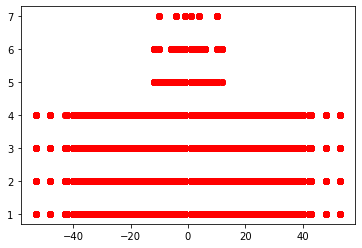

In [20]:
print('FINAL_MARGIN > 40: ', (df_tmp.FINAL_MARGIN > 40).sum())
print('FINAL_MARGIN > 50: ', (df_tmp.FINAL_MARGIN > 50).sum())
print('FINAL_MARGIN < -40: ', (df_tmp.FINAL_MARGIN < -40).sum())
print('FINAL_MARGIN < -50: ', (df_tmp.FINAL_MARGIN < -50).sum())
plt.scatter(df_tmp.FINAL_MARGIN, df_tmp.PERIOD, color='red')
plt.show()

Final margin less than -50 and more than 50 is gonna be our outliers.

SHOT_NUMBER > 20:  1271
SHOT_NUMBER > 30:  48


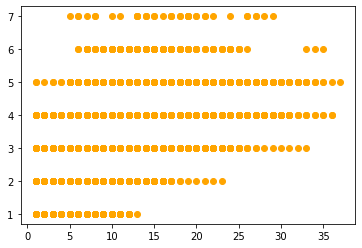

In [21]:
print('SHOT_NUMBER > 20: ', (df_tmp.SHOT_NUMBER > 20).sum())
print('SHOT_NUMBER > 30: ', (df_tmp.SHOT_NUMBER > 30).sum())
plt.scatter(df_tmp.SHOT_NUMBER, df_tmp.PERIOD, color='orange')
plt.show()

More than 30 shots in quarter seems unrealistic so we pronounce them outliers.

DRIBBLES > 20:  429
DRIBBLES > 25:  50


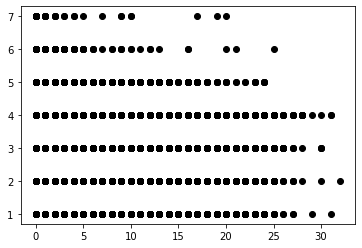

In [22]:
print('DRIBBLES > 20: ', (df_tmp.DRIBBLES > 20).sum())
print('DRIBBLES > 25: ', (df_tmp.DRIBBLES > 25).sum())
plt.scatter(df_tmp.DRIBBLES, df_tmp.PERIOD, color='black')
plt.show()

It is pretty unrealistic that player could perform more than 25 dribbles preceding shot so we can pronounce those events as outliers.

TOUCH_TIME > 10:  4011
TOUCH_TIME > 24:  192


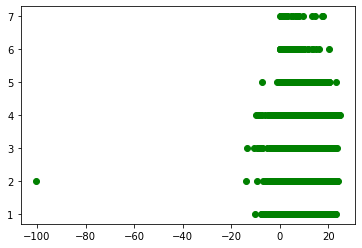

In [23]:
print('TOUCH_TIME > 10: ', (df_tmp.TOUCH_TIME > 10).sum())
print('TOUCH_TIME > 24: ', (df_tmp.TOUCH_TIME > 20).sum())
plt.scatter(df_tmp.TOUCH_TIME, df_tmp.PERIOD, color='green')
plt.show()

Attack in basketball is max 24 seconds so it is pretty unrealistic that player could hold onto ball more than that maximum so we can pronounce those events as outliers. In the above scatter plot we can also see one outlier with negative TOUCH_TIME value.

SHOT_DIST > 20:  39877
SHOT_DIST > 30:  159


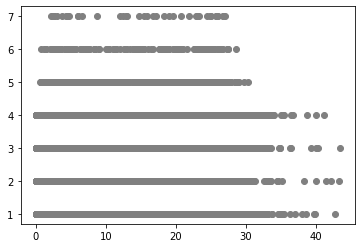

In [24]:
print('SHOT_DIST > 20: ', (df_tmp.SHOT_DIST > 20).sum())
print('SHOT_DIST > 30: ', (df_tmp.SHOT_DIST > 30).sum())
plt.scatter(df_tmp.SHOT_DIST, df_tmp.PERIOD, color='grey')
plt.show()

Basketball court dimension in NBA are 28.7m X 15.2 m so if we use Pythagorean theorem, we can easily calculate that maximum distance for performing the shot is 29.689m. So any shot exceeding 30m we can pronounce outliers.

CLOSE_DEF_DIST > 20:  168
CLOSE_DEF_DIST > 30:  42


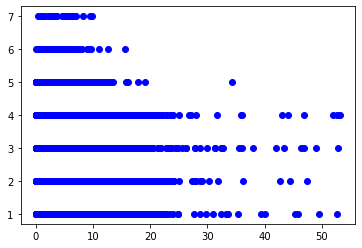

In [25]:
print('CLOSE_DEF_DIST > 20: ', (df_tmp.CLOSE_DEF_DIST > 20).sum())
print('CLOSE_DEF_DIST > 30: ', (df_tmp.CLOSE_DEF_DIST > 30).sum())
plt.scatter(df_tmp.CLOSE_DEF_DIST, df_tmp.PERIOD, color='blue')
plt.show()

This case is similar to above case. Closest defender can't be distant more than 30m if maximum is 29.689m. So any defender distant more than 30m will be outlier.

In [26]:
df_tmp.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,0,1,24,1,1,1:09,10.8,2,1.9,7.7,2,0,1.3
1,0,1,24,2,1,0:14,3.4,0,0.8,28.2,3,1,6.1
3,0,1,24,4,2,11:47,10.3,2,1.9,17.2,2,1,3.4
4,0,1,24,5,2,10:34,10.9,2,2.7,3.7,2,1,1.1
5,0,1,24,6,2,8:15,9.1,2,4.4,18.4,2,1,2.6


### Renaming some features to be easier to understand

In [27]:
df_tmp = df_tmp.rename(columns={"W": "WIN_LOSE"})
df_tmp = df_tmp.rename(columns={"CLOSE_DEF_DIST": "CLOSEST_DEF_DIST"})
x = df_tmp.copy()

## Data visualization

### Feature histograms

This method uses numpy.histogram to bin the data in x and count the number of values in each bin, then draws the distribution.

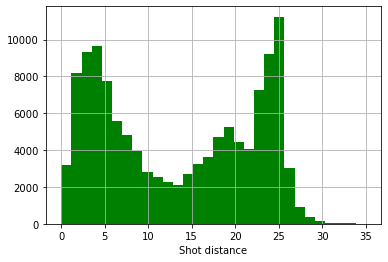

In [28]:
plt.hist(x.SHOT_DIST, bins=30, range=(0,35), color='green')
plt.xlabel('Shot distance')
plt.grid()
plt.show()

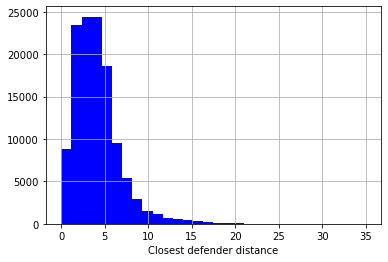

In [29]:
plt.hist(x.CLOSEST_DEF_DIST, bins=30, range=(0,35), color='blue')
plt.xlabel('Closest defender distance')
plt.grid()
plt.show()

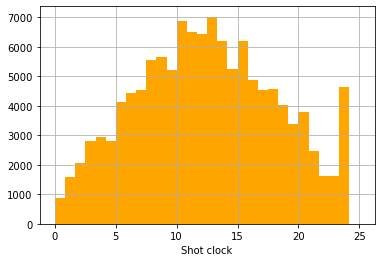

In [30]:
plt.hist(x.SHOT_CLOCK, bins=30, range=(0,25), color='orange')
plt.xlabel('Shot clock')
plt.grid()
plt.show()

### Feature pie chart

Function matplotlib.pyplot.pie plots a pie chart.

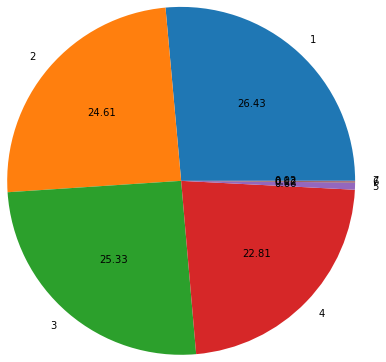

In [31]:
count_per_period = x.groupby('PERIOD').count().loc[:,'SHOT_RESULT'].values
period_name = x.groupby('PERIOD').count().index.values

plt.pie(count_per_period, labels=period_name, autopct='%.2f', pctdistance=0.6, radius=2)
plt.show()

### Feature boxplots

Make a box and whisker plot for each column of x or each vector in sequence x. The box extends from the lower to upper quartile values of the data, with a line at the median. 

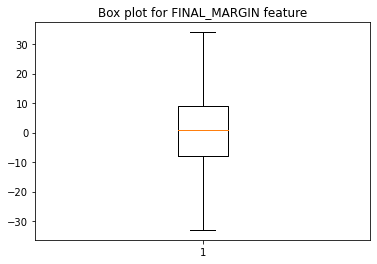

In [32]:
plt.boxplot(x.FINAL_MARGIN, showfliers=False)
plt.title('Box plot for FINAL_MARGIN feature')
plt.show()

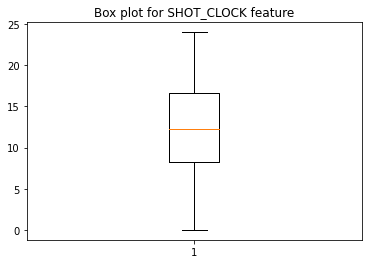

In [33]:
plt.boxplot(x.SHOT_CLOCK, showfliers=False)
plt.title('Box plot for SHOT_CLOCK feature')
plt.show()

### Feature scatter plots

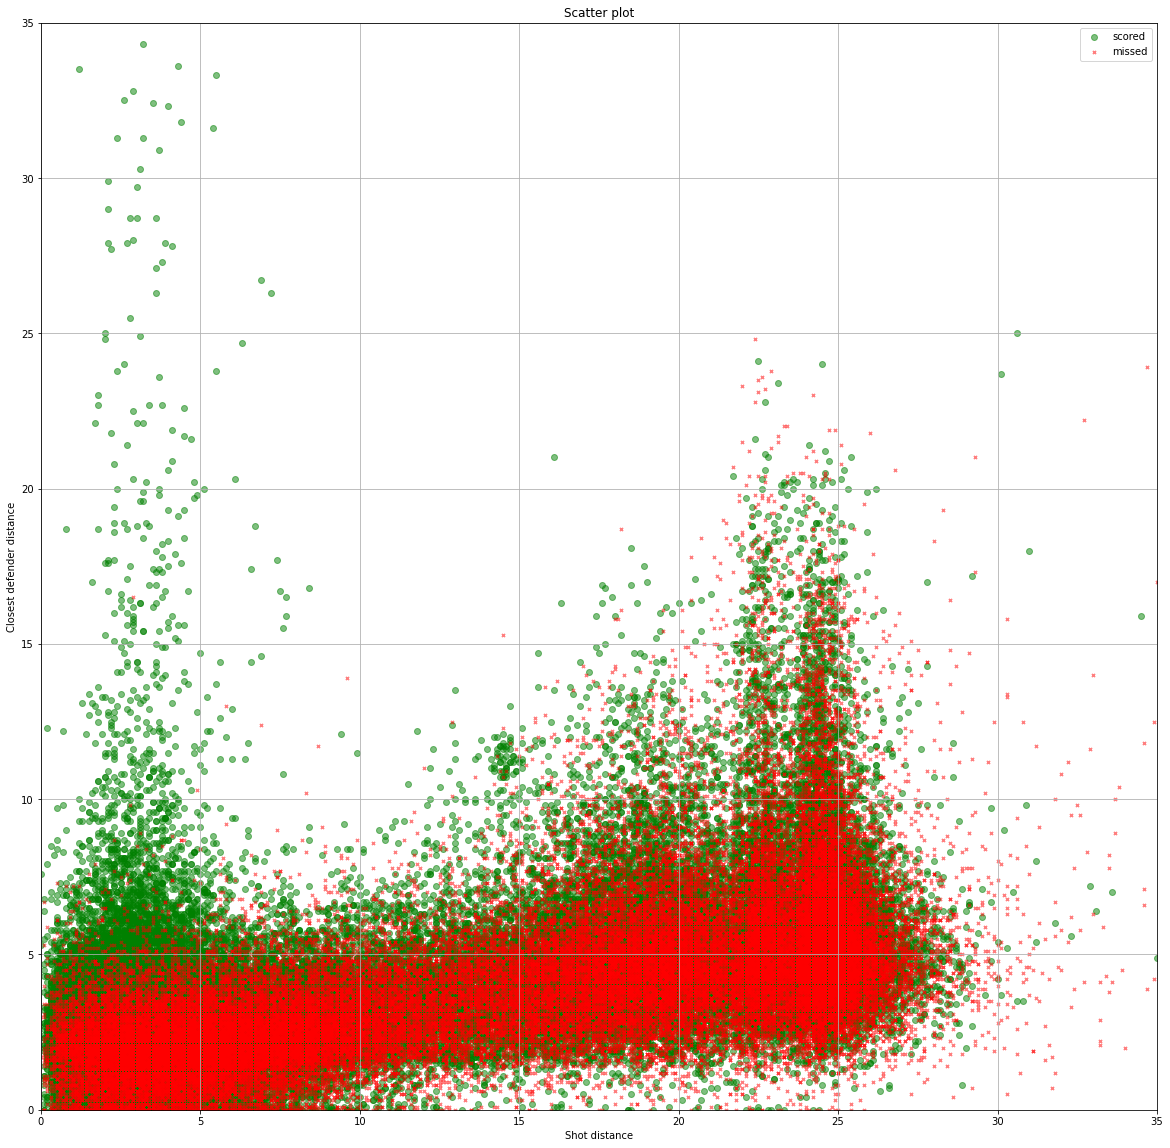

In [34]:
#Scatter plot for visualizing score success depending on shot distance and closest defender distance
#Green O-s represent shot scored, and red X-s represent shot missed
shot_scored = x.SHOT_RESULT == 0

# plot
plt.figure(figsize=(20,20))
plt.scatter(x.loc[shot_scored,'SHOT_DIST'], x.loc[shot_scored,'CLOSEST_DEF_DIST'], alpha=0.5, c='g', label='scored')
plt.scatter(x.loc[~shot_scored,'SHOT_DIST'], x.loc[~shot_scored,'CLOSEST_DEF_DIST'], s=10, alpha=0.5, marker='x', c='r', label='missed')
plt.xlabel('Shot distance')
plt.ylabel('Closest defender distance')
plt.title('Scatter plot')
plt.grid()
plt.legend(loc='best')
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.show()

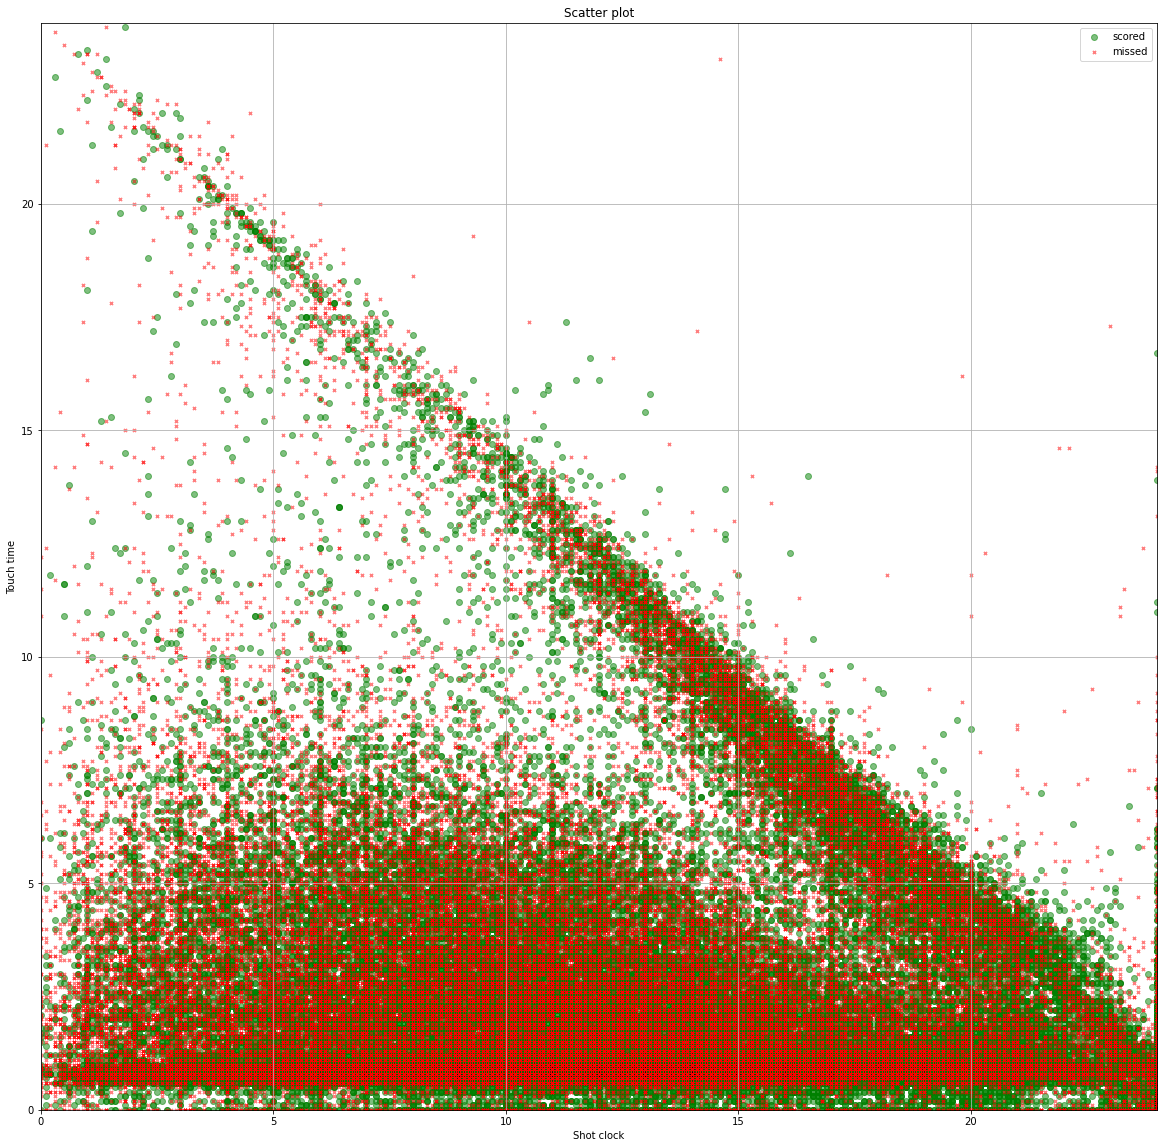

In [35]:
#Scatter plot for visualizing score success depending on shot clock and shot time
#Green O-s represent shot scored, and red X-s represent shot missed
shot_scored = x.SHOT_RESULT == 0

# plot
plt.figure(figsize=(20,20))
plt.scatter(x.loc[shot_scored,'SHOT_CLOCK'], x.loc[shot_scored,'TOUCH_TIME'], alpha=0.5, c='g', label='scored')
plt.scatter(x.loc[~shot_scored,'SHOT_CLOCK'], x.loc[~shot_scored,'TOUCH_TIME'], s=10, alpha=0.5, marker='x', c='r', label='missed')
plt.xlabel('Shot clock')
plt.ylabel('Touch time')
plt.title('Scatter plot')
plt.grid()
plt.legend(loc='best')
plt.xlim(0, 24)
plt.ylim(0, 24)
plt.show()

### Correlation heatmap

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables.

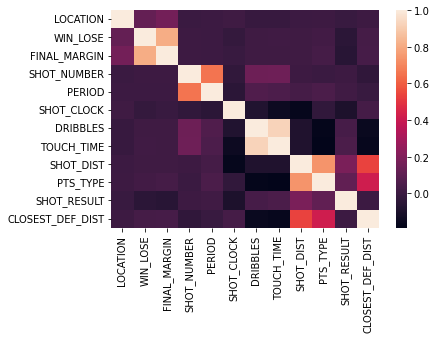

In [36]:
sns.heatmap(x.corr())
plt.show()

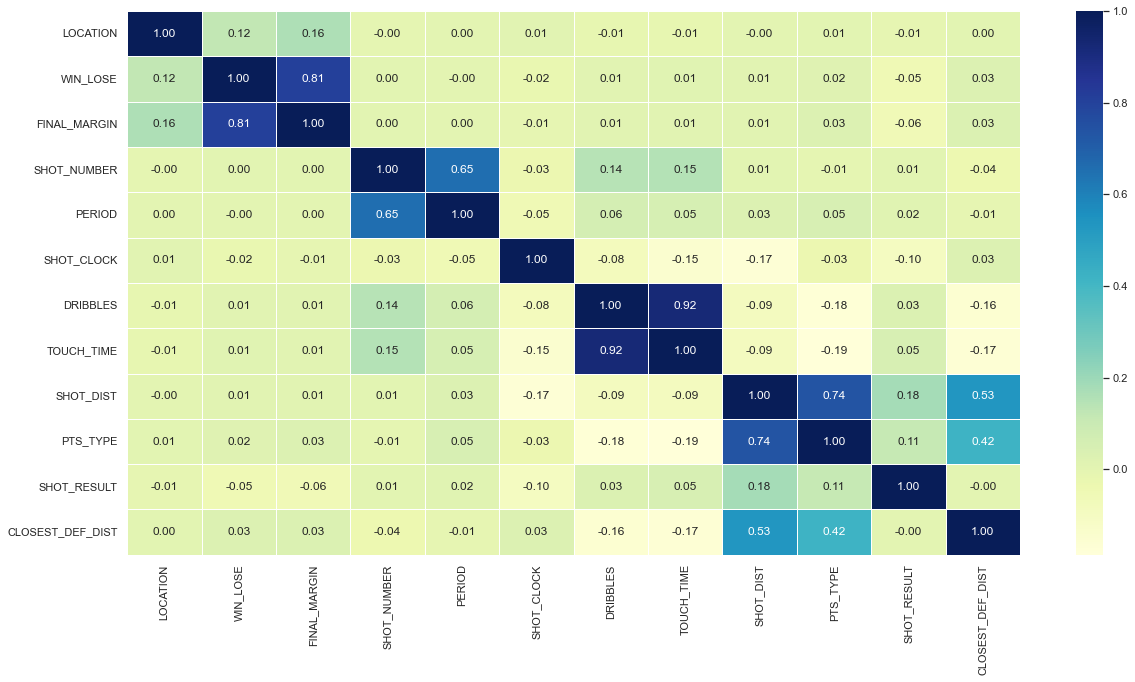

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(x.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

As we can see from above heatmaps there is no much correlated features in our dataset but we can still detect some. For example feature DRIBBLE is strongly correlated to feature TOUCH_TIME which makes perfect sense. Player can hold onto ball for max 5 seconds if he doesn't shot the ball or start to dribble. Consequently, if player's TOUCH_TIME is high he for sure dribled a bball a lot. There is also a strong correlation between SHOT_DIST and PTS_TYPE and that also makes a perfect sense. If SHOT_DIST is big PTS_TYPE for sure will be 3-point shot.

### Descriptive statistics

Mean, median, standard deviation, max, min visualizations interpreted by histograms with dashed lines.

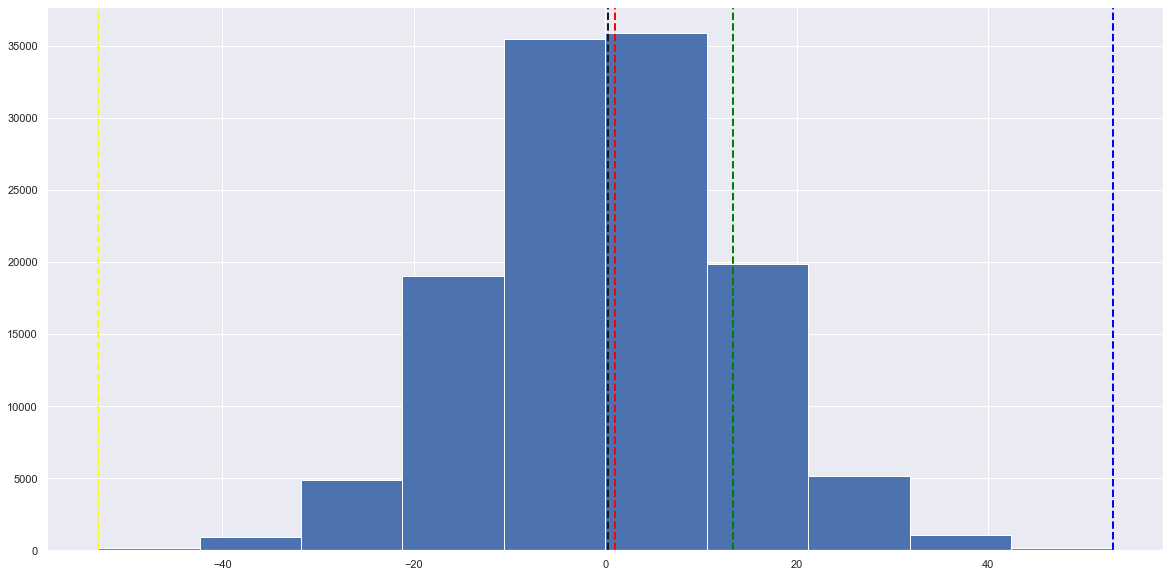

In [38]:
#FINAL_MARGIN mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.FINAL_MARGIN)
plt.axvline(x.FINAL_MARGIN.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.FINAL_MARGIN.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.FINAL_MARGIN.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.FINAL_MARGIN.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.FINAL_MARGIN.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

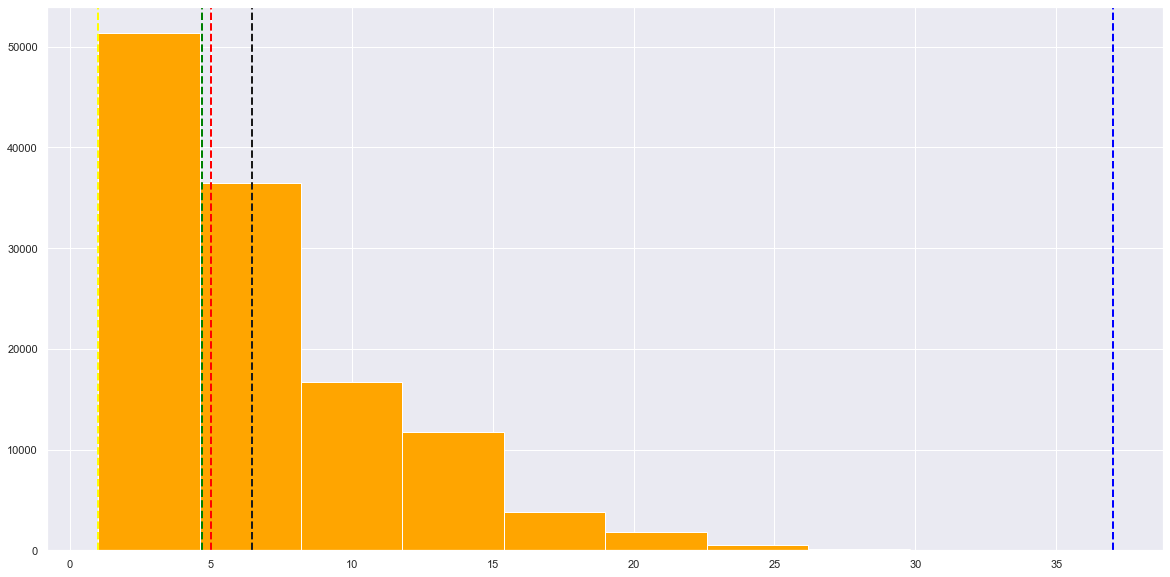

In [39]:
#SHOT_NUMBER mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.SHOT_NUMBER, color='orange')
plt.axvline(x.SHOT_NUMBER.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_NUMBER.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_NUMBER.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_NUMBER.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_NUMBER.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

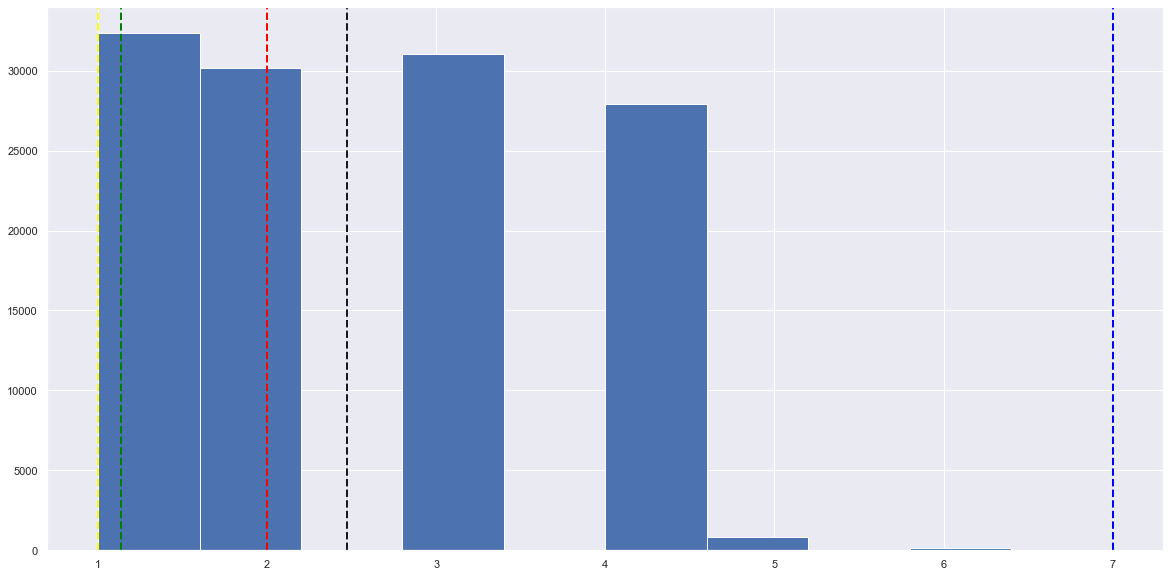

In [40]:
#PERIOD mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.PERIOD)
plt.axvline(x.PERIOD.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.PERIOD.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.PERIOD.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.PERIOD.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.PERIOD.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

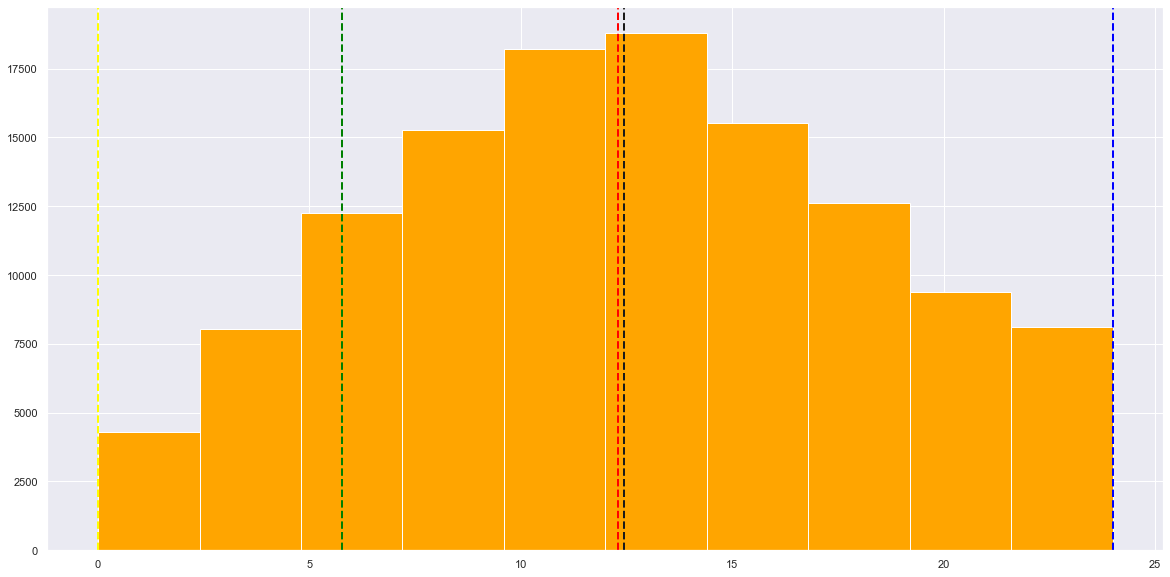

In [41]:
#SHOT_CLOCK mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.SHOT_CLOCK, color='orange')
plt.axvline(x.SHOT_CLOCK.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_CLOCK.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_CLOCK.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_CLOCK.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_CLOCK.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

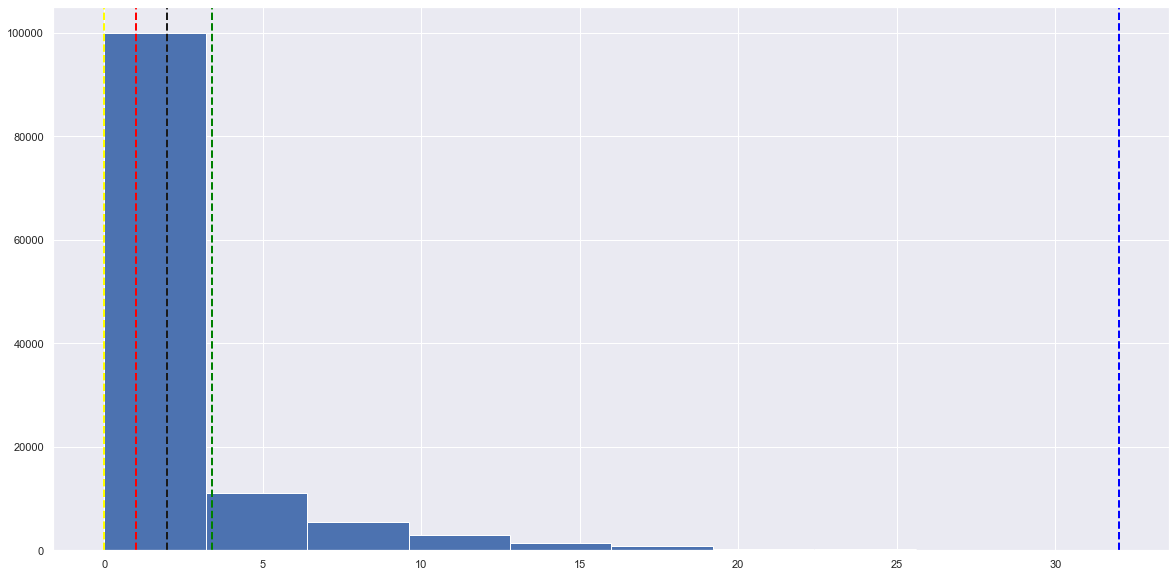

In [42]:
#DRIBBLES mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.DRIBBLES)
plt.axvline(x.DRIBBLES.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.DRIBBLES.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.DRIBBLES.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.DRIBBLES.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.DRIBBLES.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

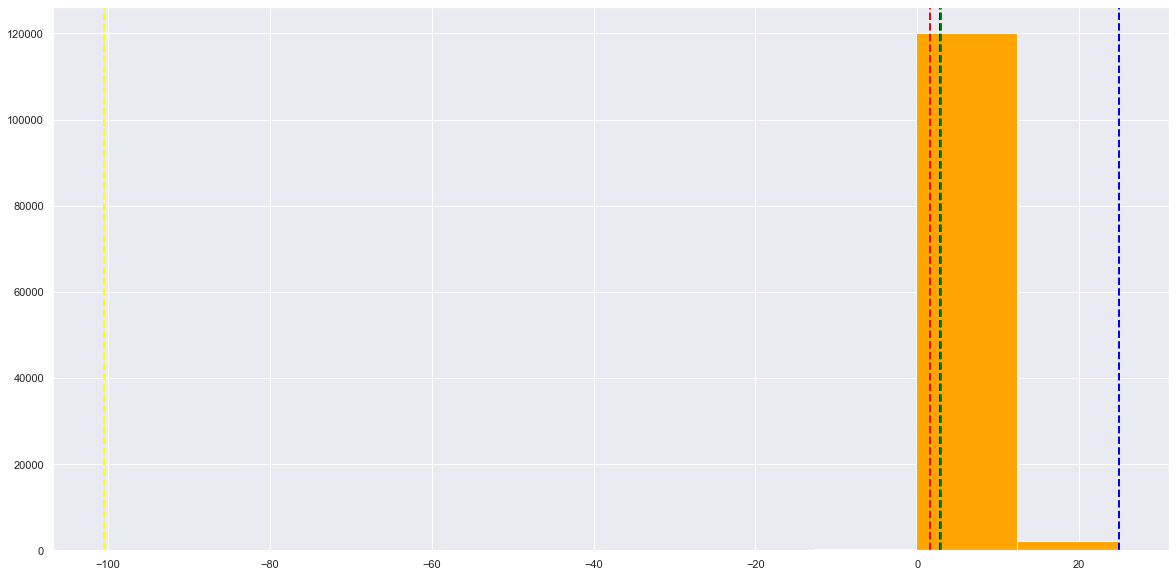

In [43]:
#TOUCH_TIME mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.TOUCH_TIME, color='orange')
plt.axvline(x.TOUCH_TIME.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.TOUCH_TIME.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.TOUCH_TIME.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.TOUCH_TIME.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.TOUCH_TIME.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

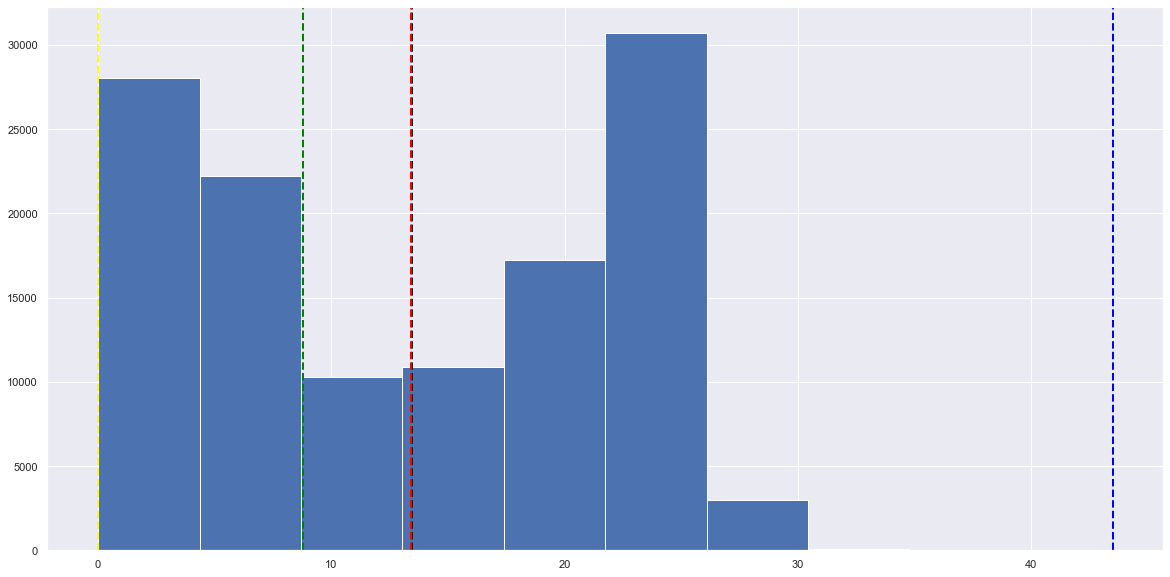

In [44]:
#SHOT_DIST mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.SHOT_DIST)
plt.axvline(x.SHOT_DIST.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_DIST.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_DIST.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_DIST.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.SHOT_DIST.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

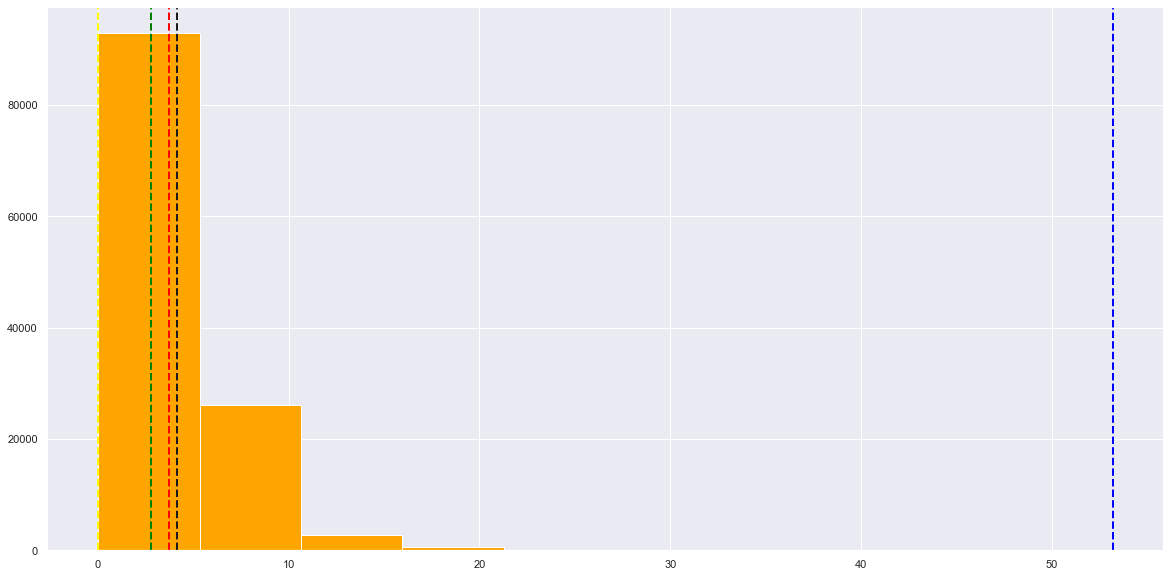

In [45]:
#CLOSEST_DEF_DIST mean(black), median(red), standard deviation(green), max(blue), min(yellow)
plt.hist(x.CLOSEST_DEF_DIST, color='orange')
plt.axvline(x.CLOSEST_DEF_DIST.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.CLOSEST_DEF_DIST.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x.CLOSEST_DEF_DIST.std(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.CLOSEST_DEF_DIST.max(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x.CLOSEST_DEF_DIST.min(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()